In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm
# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Acquire

In [4]:
df = pd.read_csv('service_calls.csv')

In [5]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,"2,125,683.00","13,695,548.00",2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,"2,169,702.00","13,725,769.00",2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,"2,116,192.00","13,692,260.00",2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,"2,082,242.00","13,737,817.00",2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,"2,082,389.00","13,737,877.00",2020-05-15T00:00:00,2021-05-15T00:00:00


In [6]:
df.shape

(495440, 17)

# Prepare

In [7]:
import wrangle

from wrangle import clean_311, split_separate_scale

In [8]:
df = clean_311(df)

In [9]:
df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
551,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,"2,142,962.00","13,699,885.00","1,393.00",8,"-1,385.00",174.12,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.09,67656,78203,1,2017,4,19055,59.81
552,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,"2,097,121.00","13,678,237.00","1,393.00",8,"-1,385.00",174.12,Very Late Response,0,0,0,1,0,0,0,0,0,0,0.08,66370,78242,1,2017,4,18500,65.21
553,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,"2,140,359.00","13,702,579.00","1,386.00",8,"-1,378.00",173.25,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.09,67656,78202,2,2017,5,19055,59.81
554,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,"2,117,463.00","13,706,003.00","1,386.00",8,"-1,378.00",173.25,Very Late Response,1,0,0,0,0,0,0,0,0,0,0.15,68081,78207,2,2017,5,23967,26.00
555,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,"2,081,307.00","13,721,187.00","1,361.00",8,"-1,353.00",170.12,Very Late Response,0,0,0,0,0,1,0,0,0,0,0.12,80007,78251,2,2017,9,23437,38.44


In [10]:
df.shape

(356804, 36)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356804 entries, 551 to 399979
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 356804 non-null  datetime64[ns]
 1   due_date                  356804 non-null  datetime64[ns]
 2   closed_date               356804 non-null  datetime64[ns]
 3   is_late                   356804 non-null  object        
 4   dept                      356804 non-null  object        
 5   call_reason               356804 non-null  object        
 6   case_type                 356804 non-null  object        
 7   case_status               356804 non-null  object        
 8   source_id                 356804 non-null  object        
 9   address                   356804 non-null  object        
 10  council_district          356804 non-null  int64         
 11  longitude                 356804 non-null  float64       
 12  

In [12]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_separate_scale(df)

In [13]:
train.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
163054,2020-09-11,2020-11-16,2020-09-14,NO,Development Services,code,Graffiti (Private Property),Closed,Web Portal,"2033 BANDERA RD, SAN ANTONIO, 78228",7,"2,102,206.00","13,719,896.00",4.00,67,63.00,0.06,Very Early Response,0,0,0,0,0,0,1,0,0,0,0.15,83287,78228,9,2020,37,25263,32.82
50372,2020-06-03,2020-06-10,2020-06-05,NO,Solid Waste Management,waste,Carts(Removed from Service),Closed,Web Portal,"134 KASHMUIR PLACE, SAN ANTONIO, 78223",3,"2,143,294.00","13,686,716.00",3.00,8,5.00,0.38,Very Early Response,0,0,1,0,0,0,0,0,0,0,0.11,69022,78223,6,2020,23,18281,116.15
52193,2020-06-04,2020-06-14,2020-06-21,YES,Animal Care Services,field,Animal Bite(Critical),Closed,Web Portal,"1250 NICHOLAS MANOR, SAN ANTONIO, 78258",9,"2,135,742.00","13,781,904.00",18.00,11,-7.00,1.64,Late Response,0,0,0,0,0,0,0,0,1,0,0.18,99309,78258,6,2020,23,42559,48.71
143136,2020-08-24,2020-08-31,2020-08-25,NO,Solid Waste Management,waste,Carts(Lost-Stolen),Closed,Web Portal,"4702 E SOUTHCROSS BLVD, SAN ANTONIO, 78222",3,"2,159,441.00","13,683,966.00",2.00,8,6.00,0.25,Very Early Response,0,0,1,0,0,0,0,0,0,0,0.11,69022,78222,8,2020,35,18281,116.15
180816,2020-10-01,2020-10-14,2020-10-08,NO,Solid Waste Management,waste,Out of Cycle(Brush/Bulky),Closed,Web Portal,"7134 SYMPHONY LANE, SAN ANTONIO, 78214",3,"2,137,290.00","13,676,779.00",8.00,14,6.00,0.57,Early Response,0,0,1,0,0,0,0,0,0,0,0.11,69022,78214,10,2020,40,18281,116.15


In [14]:
train.shape

(199810, 36)

In [15]:
validate.shape

(85633, 36)

In [16]:
test.shape

(71361, 36)

In [17]:
X_train.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
163054,2020-09-11,2020-11-16,2020-09-14,NO,Development Services,code,Graffiti (Private Property),Closed,Web Portal,"2033 BANDERA RD, SAN ANTONIO, 78228",7,"2,102,206.00","13,719,896.00",4.00,67,63.00,0.06,0,0,0,0,0,0,1,0,0,0,0.15,83287,78228,9,2020,37,25263,32.82
50372,2020-06-03,2020-06-10,2020-06-05,NO,Solid Waste Management,waste,Carts(Removed from Service),Closed,Web Portal,"134 KASHMUIR PLACE, SAN ANTONIO, 78223",3,"2,143,294.00","13,686,716.00",3.00,8,5.00,0.38,0,0,1,0,0,0,0,0,0,0,0.11,69022,78223,6,2020,23,18281,116.15
52193,2020-06-04,2020-06-14,2020-06-21,YES,Animal Care Services,field,Animal Bite(Critical),Closed,Web Portal,"1250 NICHOLAS MANOR, SAN ANTONIO, 78258",9,"2,135,742.00","13,781,904.00",18.00,11,-7.00,1.64,0,0,0,0,0,0,0,0,1,0,0.18,99309,78258,6,2020,23,42559,48.71
143136,2020-08-24,2020-08-31,2020-08-25,NO,Solid Waste Management,waste,Carts(Lost-Stolen),Closed,Web Portal,"4702 E SOUTHCROSS BLVD, SAN ANTONIO, 78222",3,"2,159,441.00","13,683,966.00",2.00,8,6.00,0.25,0,0,1,0,0,0,0,0,0,0,0.11,69022,78222,8,2020,35,18281,116.15
180816,2020-10-01,2020-10-14,2020-10-08,NO,Solid Waste Management,waste,Out of Cycle(Brush/Bulky),Closed,Web Portal,"7134 SYMPHONY LANE, SAN ANTONIO, 78214",3,"2,137,290.00","13,676,779.00",8.00,14,6.00,0.57,0,0,1,0,0,0,0,0,0,0,0.11,69022,78214,10,2020,40,18281,116.15


In [18]:
X_train.shape

(199810, 35)

In [19]:
y_train.head()

163054    Very Early Response
50372     Very Early Response
52193           Late Response
143136    Very Early Response
180816         Early Response
Name: level_of_delay, dtype: category
Categories (5, object): ['Very Early Response' < 'Early Response' < 'On Time Response' < 'Late Response' < 'Very Late Response']

In [20]:
y_train.shape

(199810,)

In [21]:
train_scaled.head()

,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,open_month,open_year,open_week,per_capita_income,square_miles
0,0.67,0.34,0.53,0.00,0.07,0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.71,0.58,0.73,0.75,0.69,0.40,0.11
1,0.22,0.59,0.35,0.00,0.01,0.73,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.20,0.45,0.75,0.42,0.15,1.00
2,0.89,0.54,0.86,0.01,0.01,0.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.45,0.75,0.42,1.00,0.28
3,0.22,0.69,0.34,0.00,0.01,0.73,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.20,0.64,0.75,0.65,0.15,1.00
4,0.22,0.55,0.30,0.01,0.01,0.73,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.20,0.82,0.75,0.75,0.15,1.00


In [22]:
train_scaled.shape

(199810, 24)

# Explore

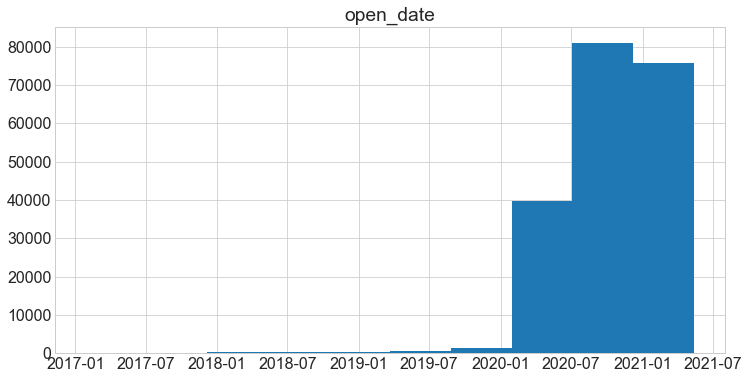

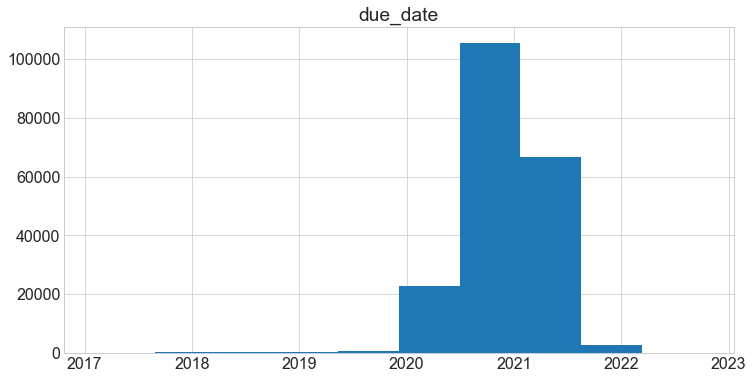

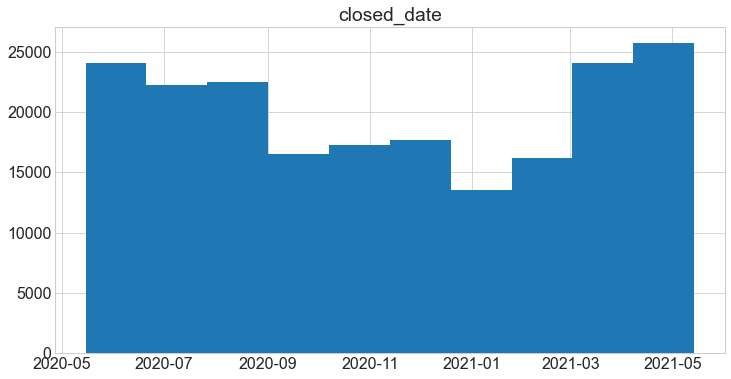

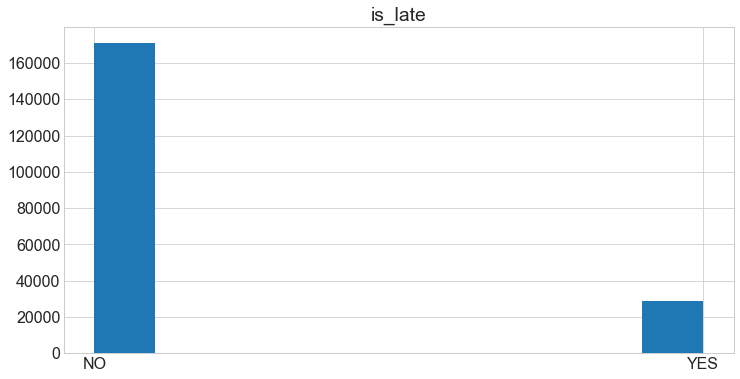

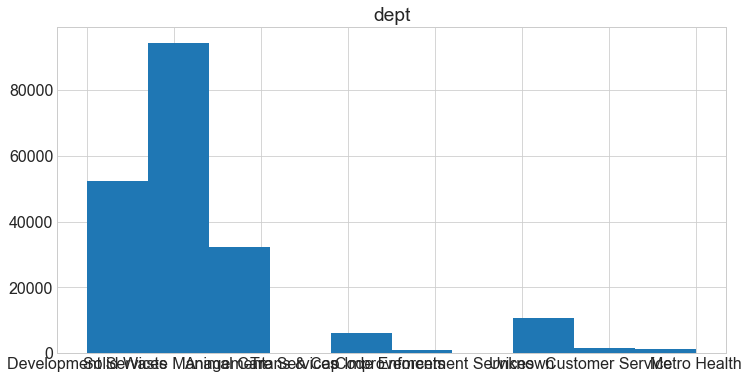

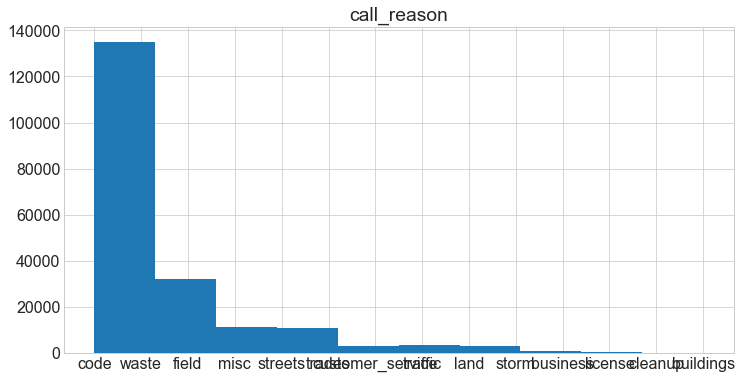

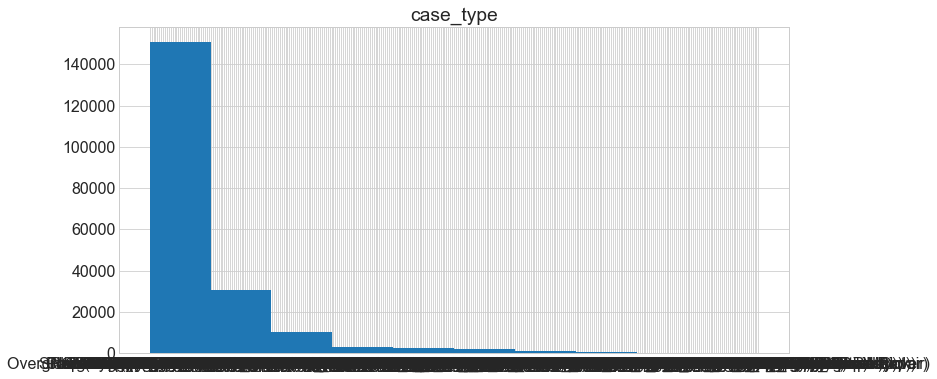

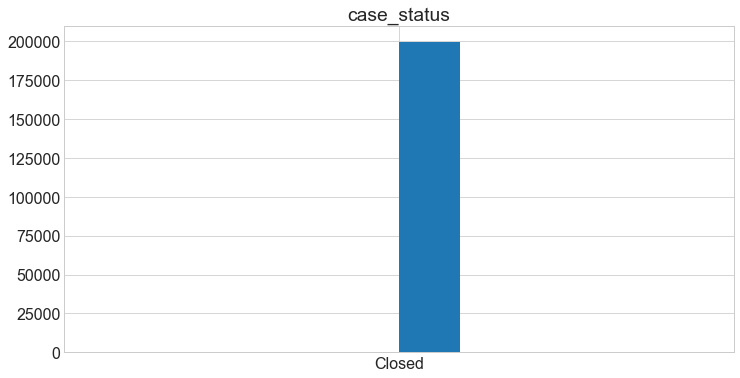

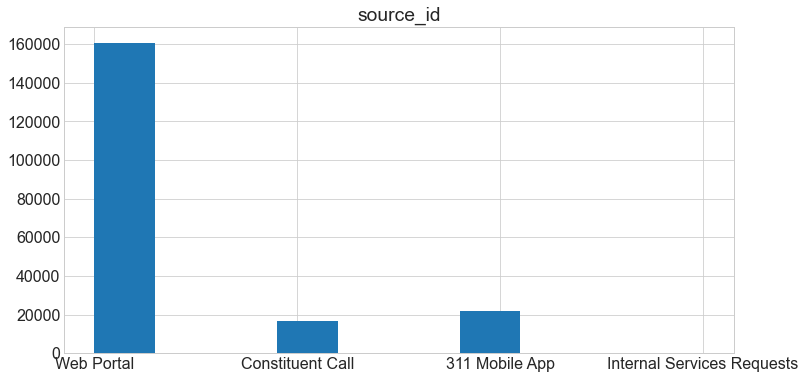

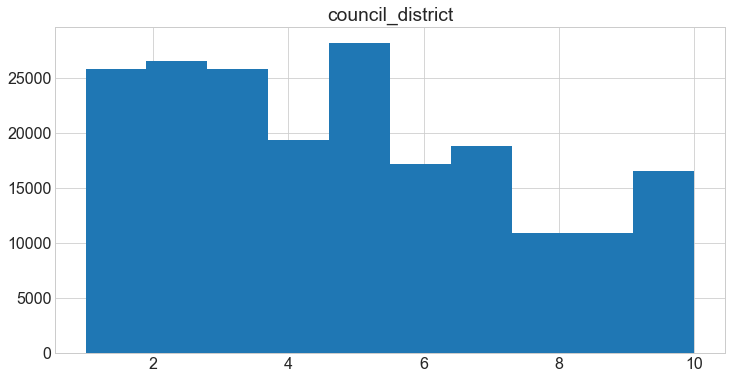

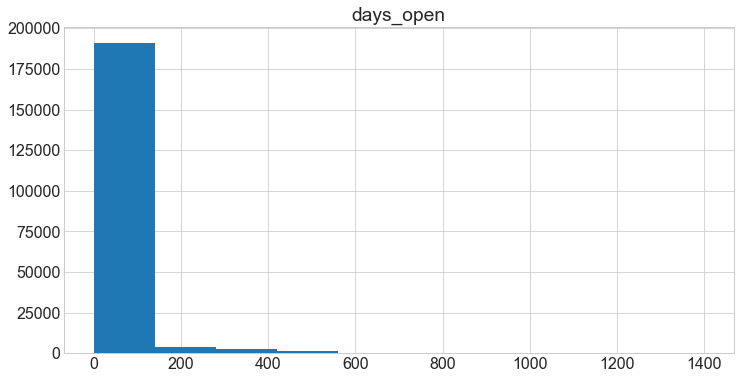

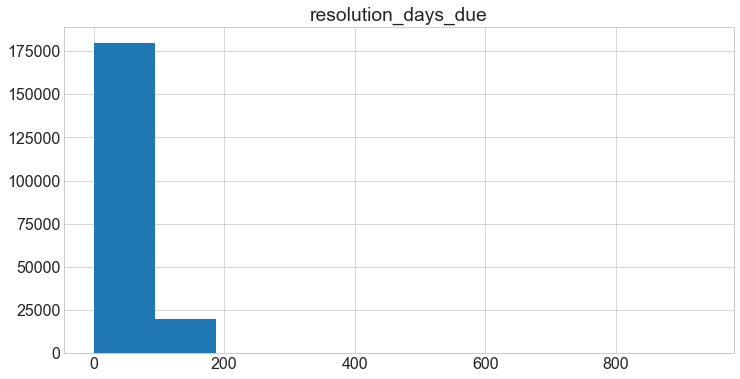

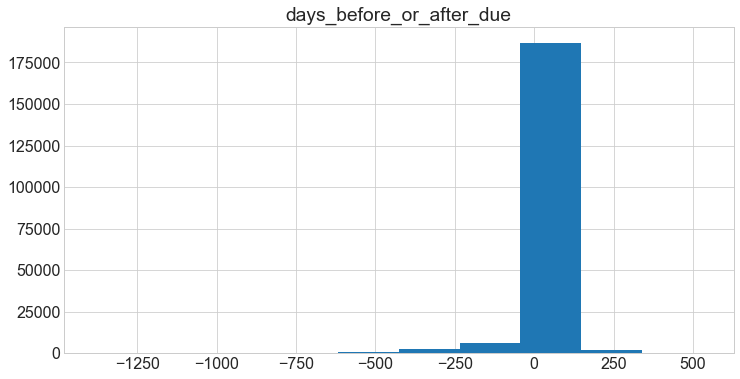

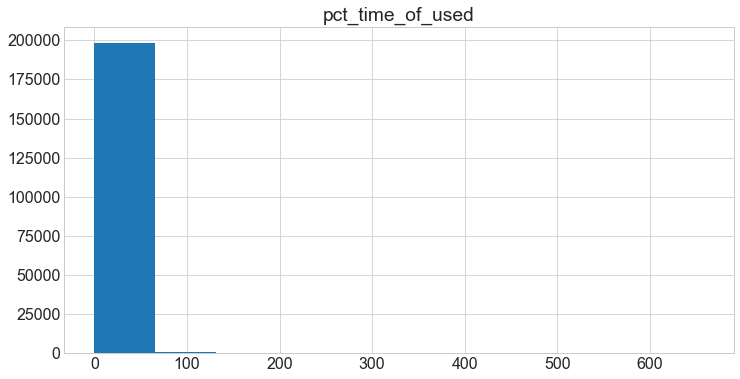

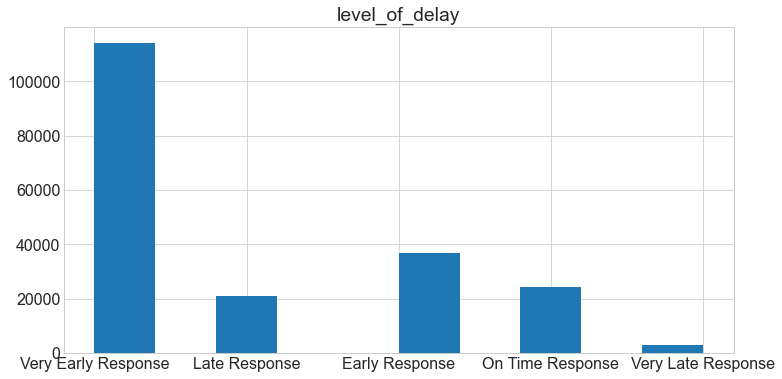

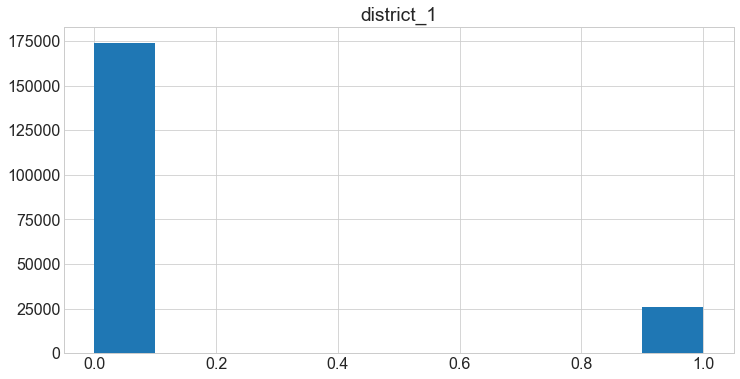

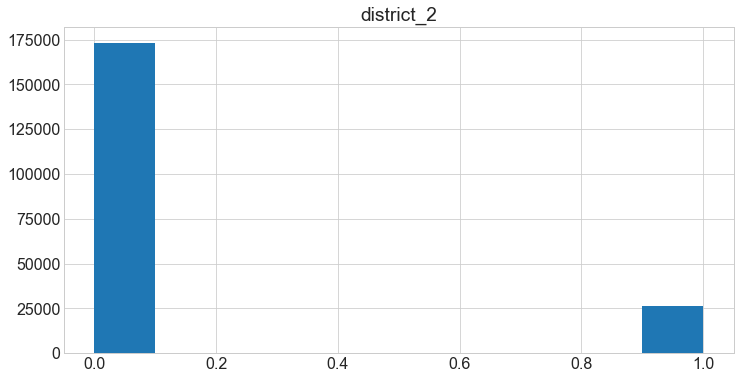

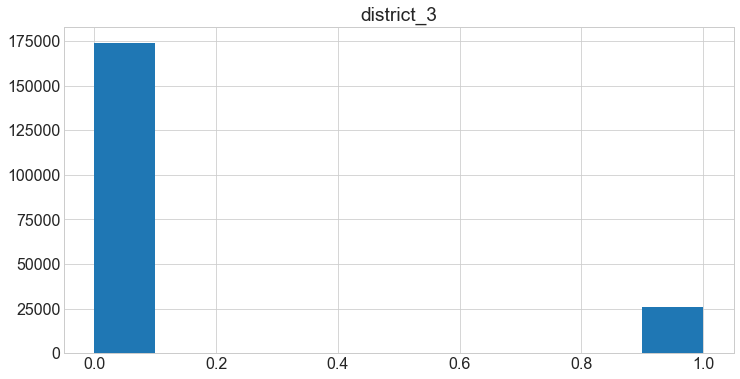

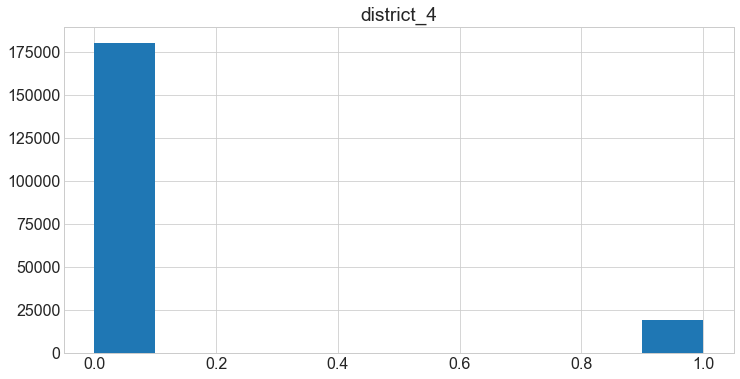

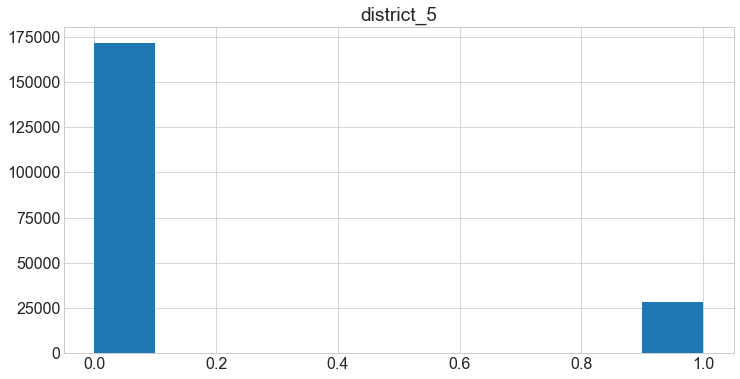

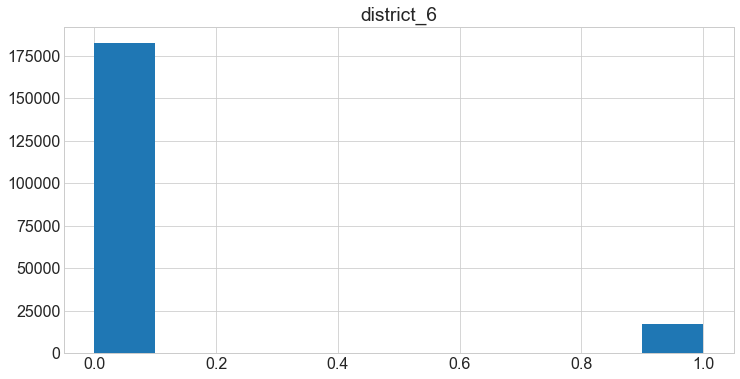

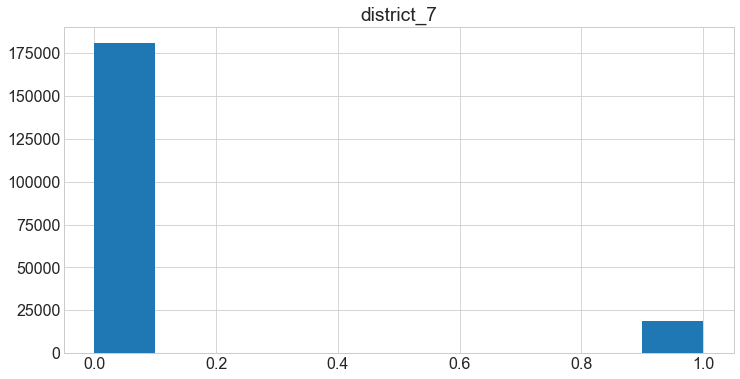

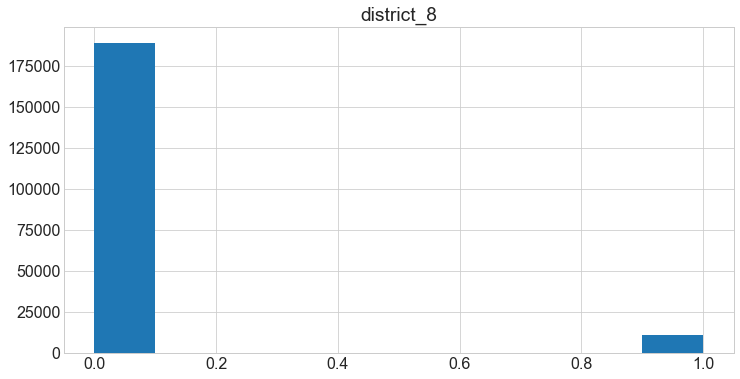

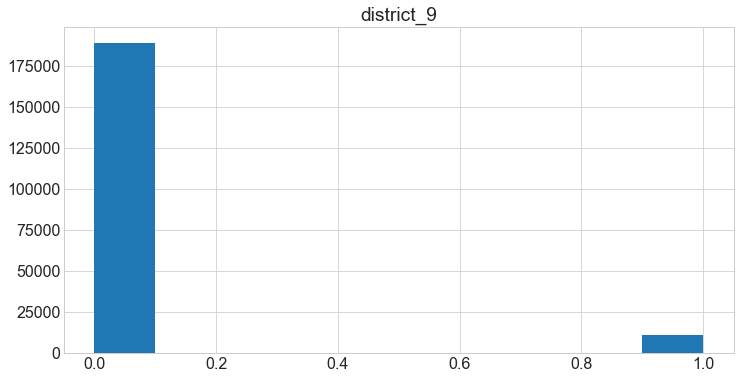

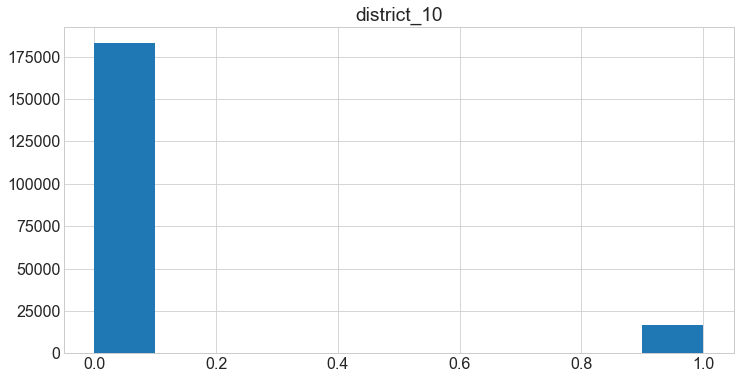

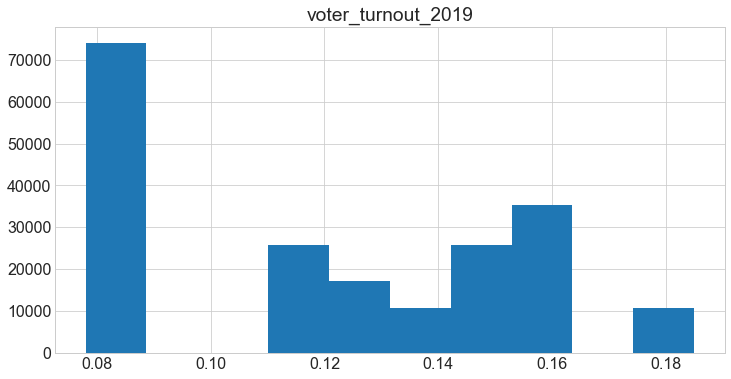

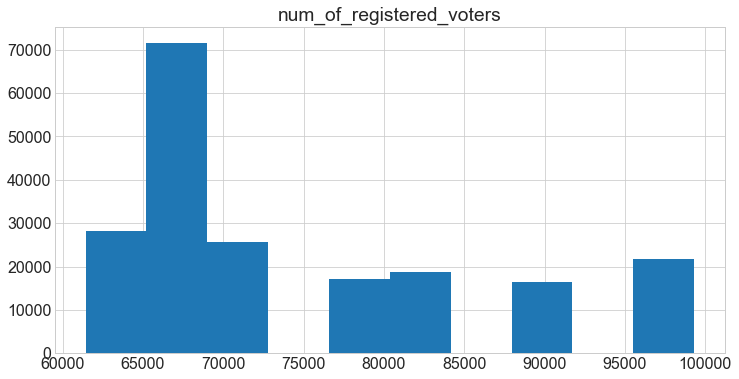

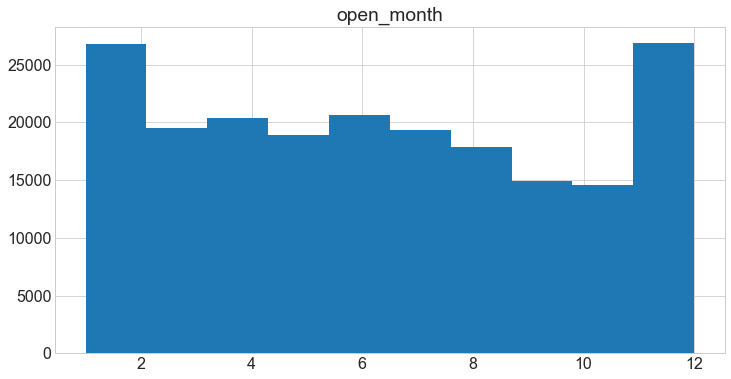

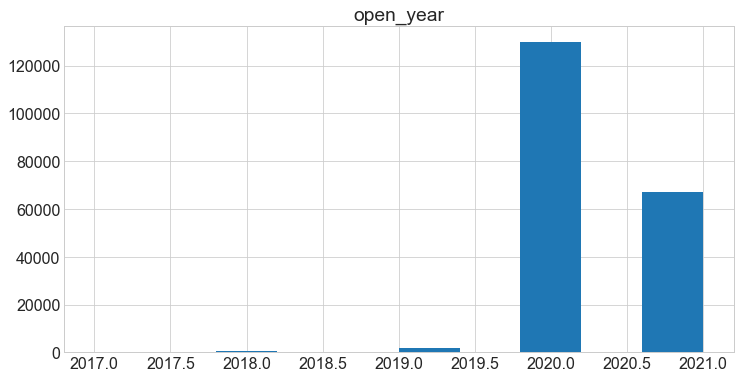

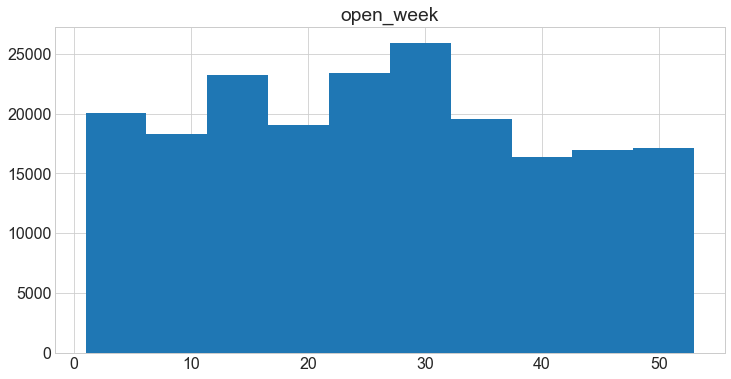

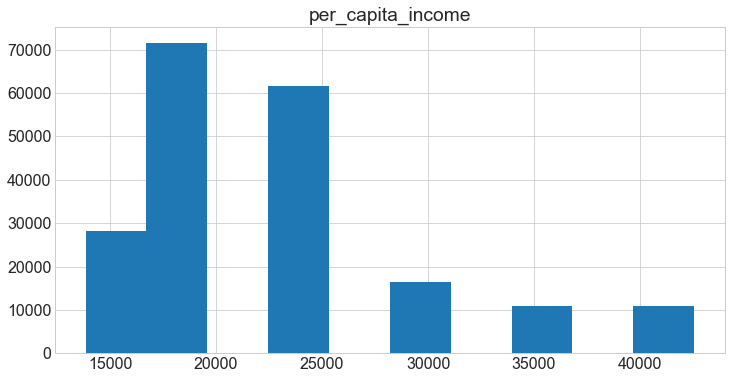

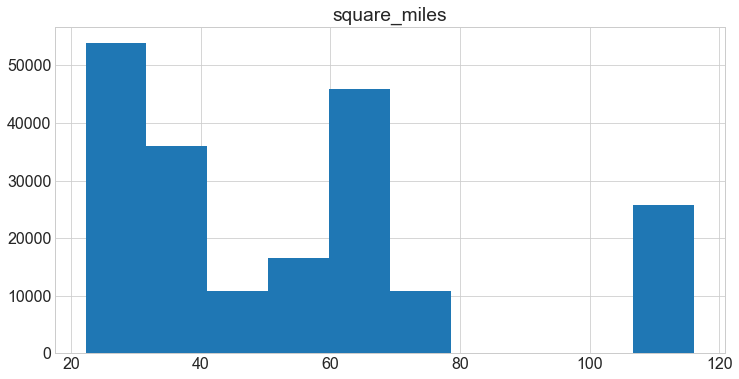

In [23]:
for col in train.drop(columns = ['address', 'longitude', 'latitude', 'zipcode']).columns:
    plt.figure(figsize=(12,6))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

### Takeaways

- Most cases are closed on time

- most cases were created with the web portal

- most cases are from this last year

- most responses are due on time and early even

## Q1: Is there a difference in response time between districts?

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199810 entries, 163054 to 53192
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 199810 non-null  datetime64[ns]
 1   due_date                  199810 non-null  datetime64[ns]
 2   closed_date               199810 non-null  datetime64[ns]
 3   is_late                   199810 non-null  object        
 4   dept                      199810 non-null  object        
 5   call_reason               199810 non-null  object        
 6   case_type                 199810 non-null  object        
 7   case_status               199810 non-null  object        
 8   source_id                 199810 non-null  object        
 9   address                   199810 non-null  object        
 10  council_district          199810 non-null  int64         
 11  longitude                 199810 non-null  float64       
 12

In [25]:
train.council_district.value_counts()

5     28179
2     26496
1     25768
3     25756
4     19356
7     18808
6     17129
10    16548
8     10893
9     10877
Name: council_district, dtype: int64

In [26]:
train.days_open.mean()

24.62484360142135

In [27]:
train.groupby('council_district').days_open.mean().sort_values()

council_district
8                   17.54
9                   17.94
10                  21.45
1                   22.66
7                   22.72
4                   23.93
5                   24.09
6                   24.11
3                   27.15
2                   34.49
Name: days_open, dtype: float64

In [28]:
train.groupby('council_district').days_open.median().sort_values()

council_district
4                    2.00
5                    2.00
1                    3.00
3                    3.00
6                    3.00
7                    3.00
8                    3.00
9                    3.00
10                   3.00
2                    4.00
Name: days_open, dtype: float64

<AxesSubplot:xlabel='level_of_delay', ylabel='Count'>

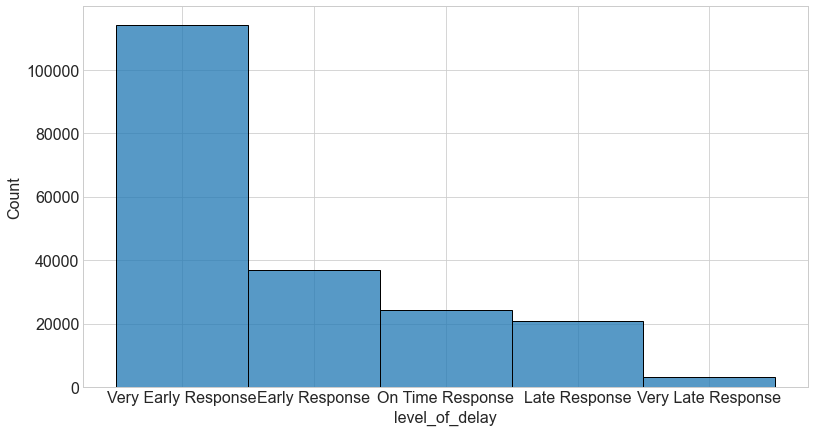

In [29]:
sns.histplot(data = train, x = 'level_of_delay')

In [30]:
train.groupby('council_district').days_before_or_after_due.mean().sort_values()

council_district
2                    1.73
4                    3.62
6                    5.95
9                    6.34
3                    6.43
10                   7.46
7                   10.04
5                   11.69
8                   12.17
1                   15.80
Name: days_before_or_after_due, dtype: float64

In [31]:
train.groupby('council_district').days_before_or_after_due.median().sort_values()

council_district
2                    4.00
3                    4.00
4                    4.00
9                    4.00
1                    5.00
5                    5.00
6                    5.00
7                    5.00
8                    5.00
10                   5.00
Name: days_before_or_after_due, dtype: float64

In [32]:
train.groupby('council_district').days_before_or_after_due.min().sort_values()

council_district
4               -1,385.00
1               -1,378.00
2               -1,378.00
6               -1,353.00
3               -1,344.00
5               -1,313.00
7               -1,290.00
8               -1,225.00
9               -1,142.00
10              -1,141.00
Name: days_before_or_after_due, dtype: float64

In [33]:
train.groupby('council_district').days_before_or_after_due.max().sort_values()

council_district
4                  502.00
7                  516.00
9                  517.00
10                 517.00
2                  519.00
6                  519.00
3                  520.00
8                  527.00
5                  530.00
1                  532.00
Name: days_before_or_after_due, dtype: float64

In [34]:
train.groupby('council_district').level_of_delay.value_counts()

council_district  level_of_delay     
1                 Very Early Response    15934
                  Early Response          4304
                  On Time Response        2872
                  Late Response           2289
                  Very Late Response       369
2                 Very Early Response    13633
                  Early Response          4604
                  Late Response           3926
                  On Time Response        3889
                  Very Late Response       444
3                 Very Early Response    14235
                  Early Response          4622
                  Late Response           3240
                  On Time Response        3217
                  Very Late Response       442
4                 Very Early Response    11013
                  Early Response          3584
                  On Time Response        2246
                  Late Response           2212
                  Very Late Response       301
5                 Very

### Takeaways

- Districts 5, 1, 2, and 3 have the highest volume of cases respectively

- District 0 has the longest avg response time, as well as the least amount of cases 

- District 9 has the shortest avg response time 

- District 2 is the best at meeting their deadlines while District 1 is the worst 

- There are instances of cases being given years to resolve issues and some cases taking years to resolve

- Across all districts, most cases are resolved early

- medians of all values were lower than mean, which likely means there are outliers skewing the data

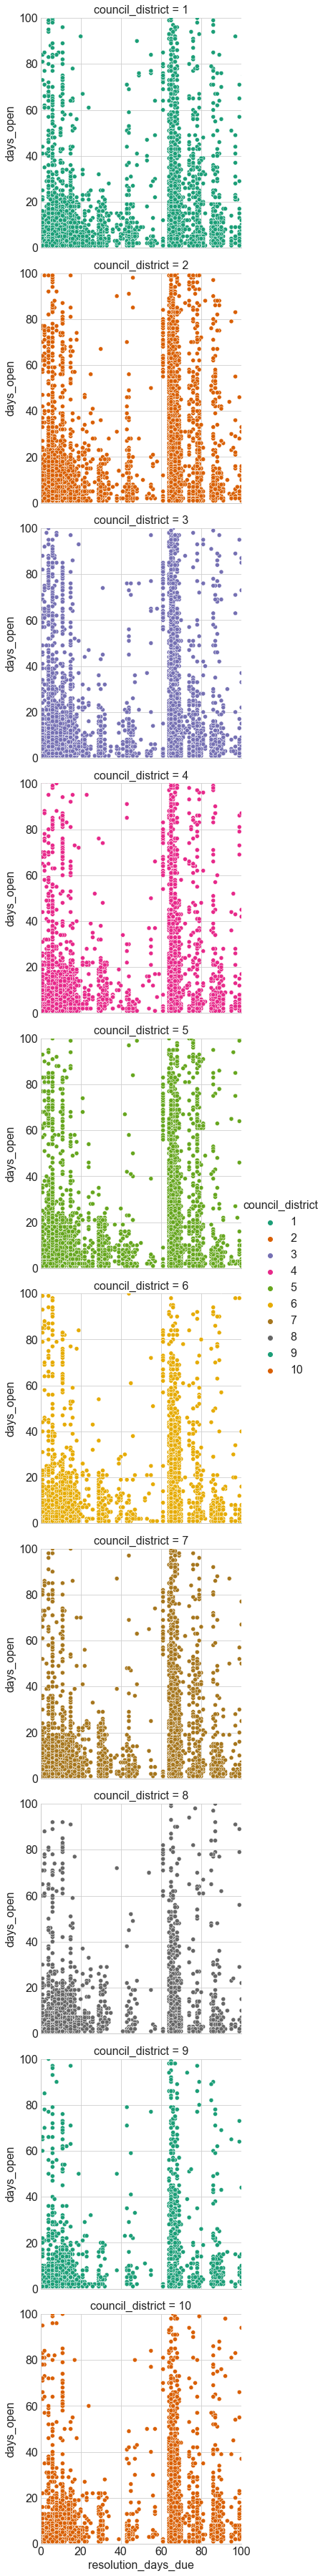

In [35]:
plot = sns.relplot(data = train, x = 'resolution_days_due', y = 'days_open', hue = 'council_district', row = 'council_district', palette= 'Dark2')

plot.set(ylim=(0, 100))

plot.set(xlim=(0, 100))


### Takeaways

- There is no strong linear correlation between due date and how long a case stays open among any district

- There is a straight vertical line around the 60 day mark for days due, perhaps that is a default setting?

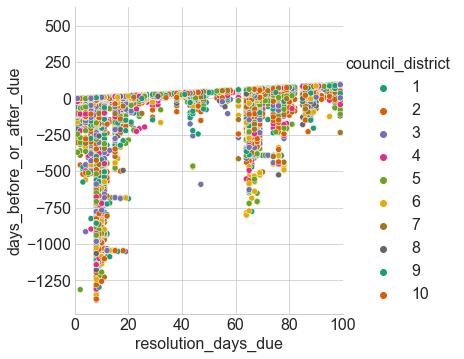

In [36]:
plot = sns.relplot(data = train, x = 'resolution_days_due', y = 'days_before_or_after_due', hue = 'council_district', palette= 'Dark2')

plot.set(xlim=(0, 100))

In [37]:
def resolution_days_due_vs_days_before_or_after_due(train):
    '''
    This function will take in the train dataframe from the City of San Antonio 311 Data
    and return a graph dipicting the linear relationship between how many days a case is 
    given to be resolved and how many days the case is early or late
    '''
    
    plot = sns.relplot(data = train, x = 'resolution_days_due', y = 'days_before_or_after_due', hue = 'council_district', palette= 'Dark2')

    plot.set(xlim=(0, 100))

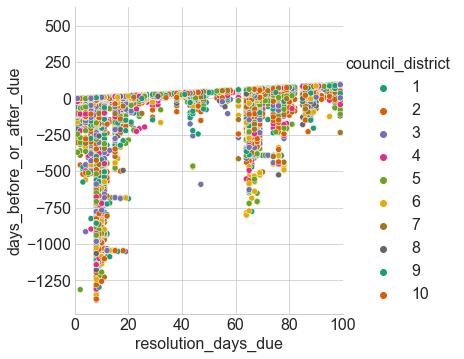

In [38]:
resolution_days_due_vs_days_before_or_after_due(train)

### Takeaways

- there does appear to be a linear correlation between how many days a task is given to be accomplished and how early a case can be closed before it is due

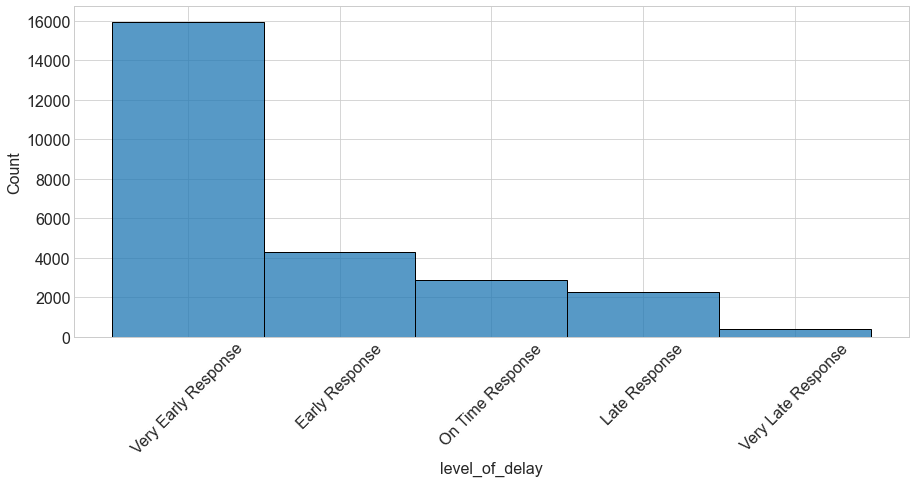

In [39]:
district1 = train[train['district_1'] == 1]

sns.histplot(data = district1, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

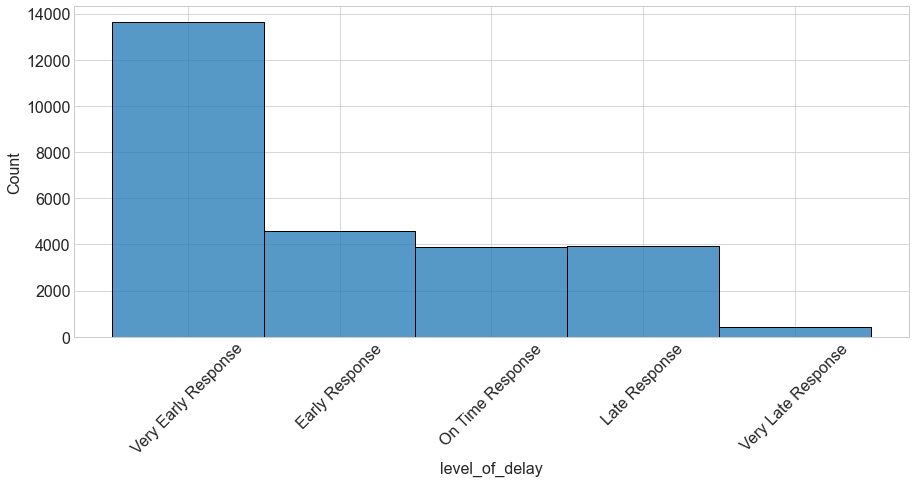

In [40]:
district2 = train[train['district_2'] == 1]

sns.histplot(data = district2, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

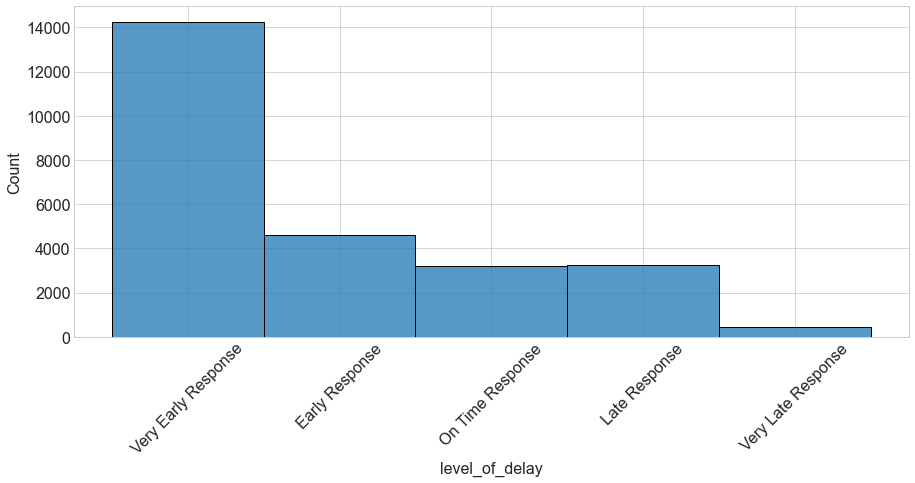

In [41]:
district3 = train[train['district_3'] == 1]

sns.histplot(data = district3, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

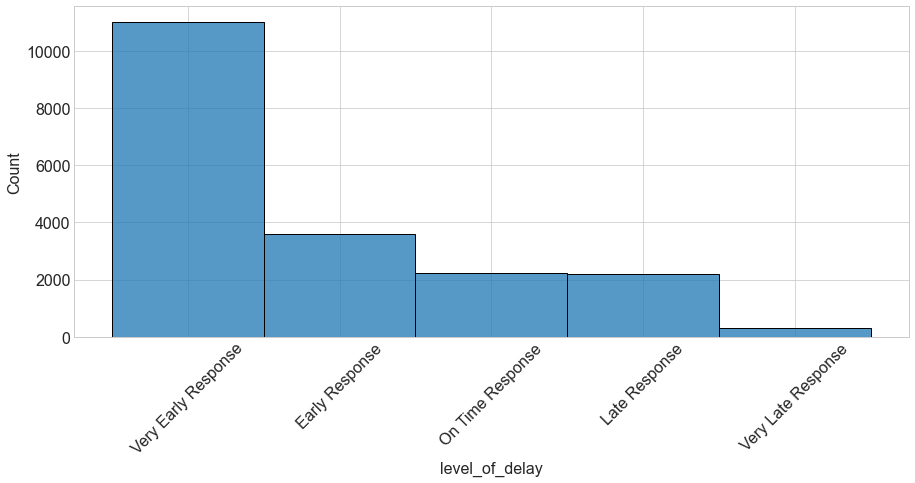

In [42]:
district4 = train[train['district_4'] == 1]

sns.histplot(data = district4, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

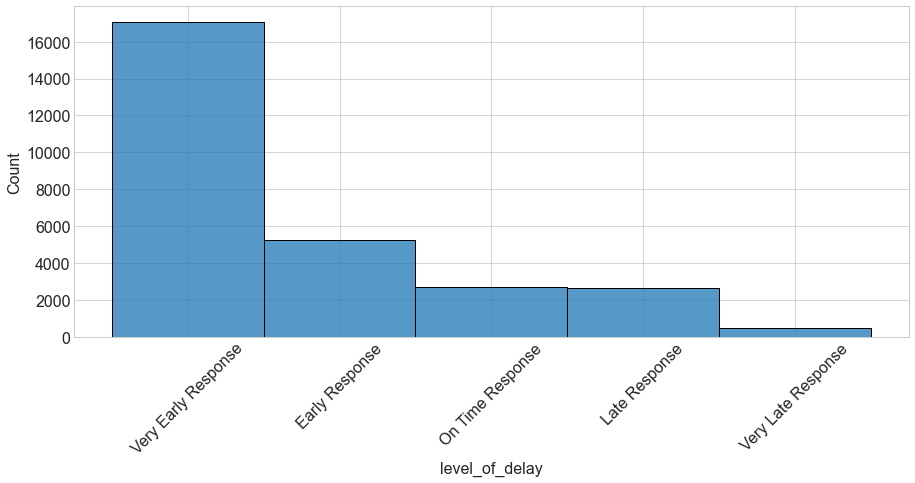

In [43]:
district5 = train[train['district_5'] == 1]

sns.histplot(data = district5, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

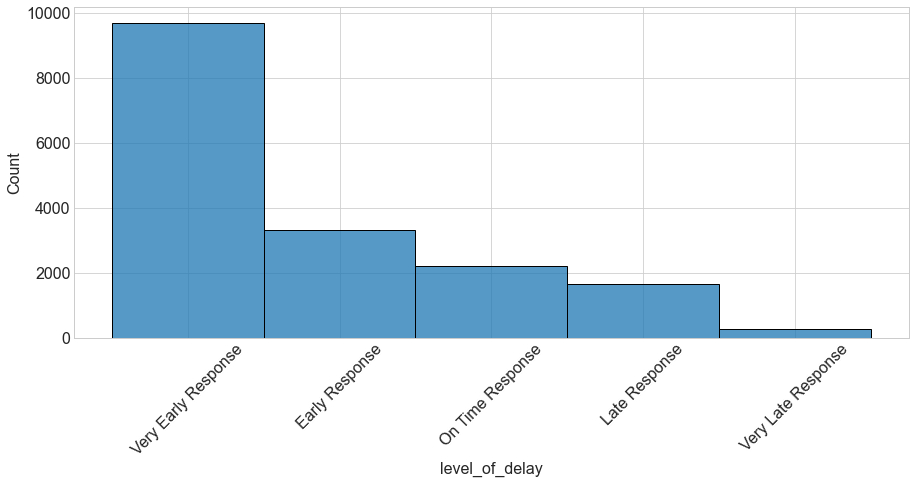

In [44]:
district6 = train[train['district_6'] == 1]

sns.histplot(data = district6, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

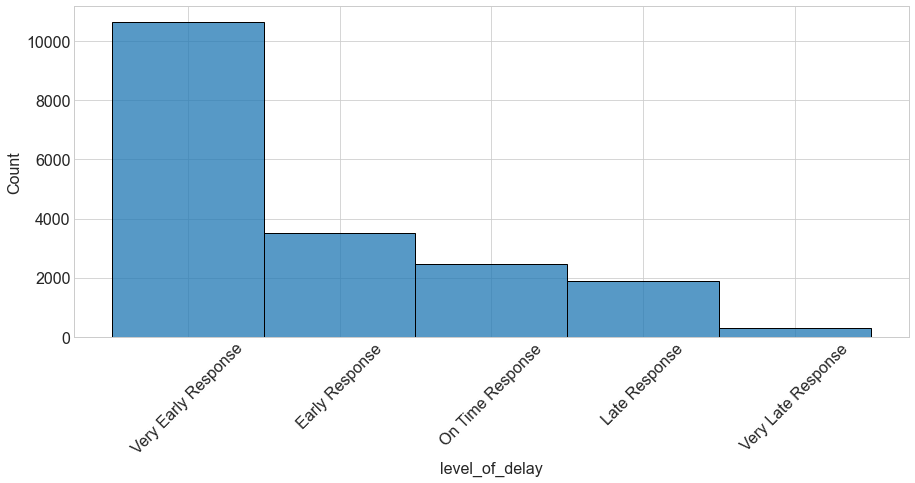

In [45]:
district7 = train[train['district_7'] == 1]

sns.histplot(data = district7, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

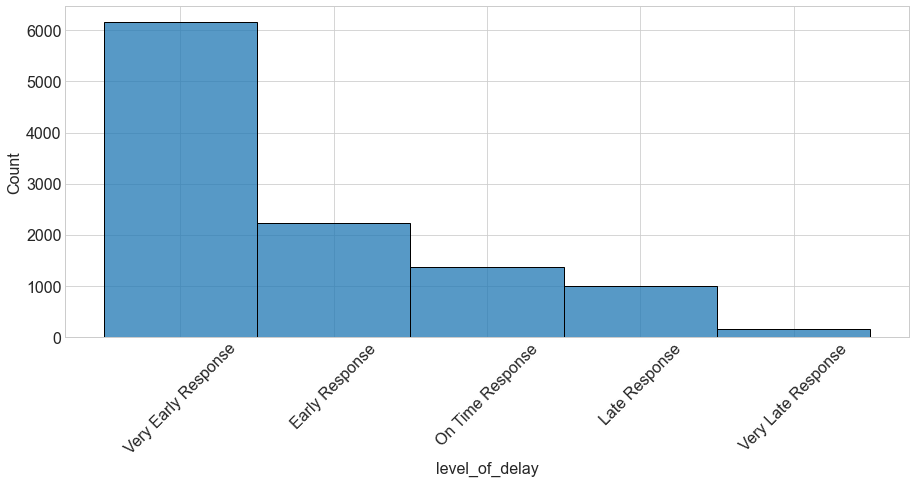

In [46]:
district8 = train[train['district_8'] == 1]

sns.histplot(data = district8, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

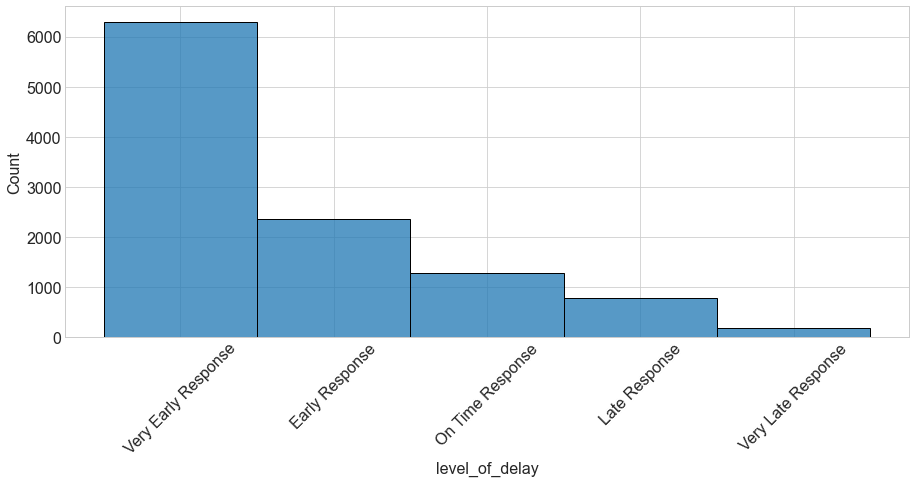

In [47]:
district9 = train[train['district_9'] == 1]

sns.histplot(data = district9, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

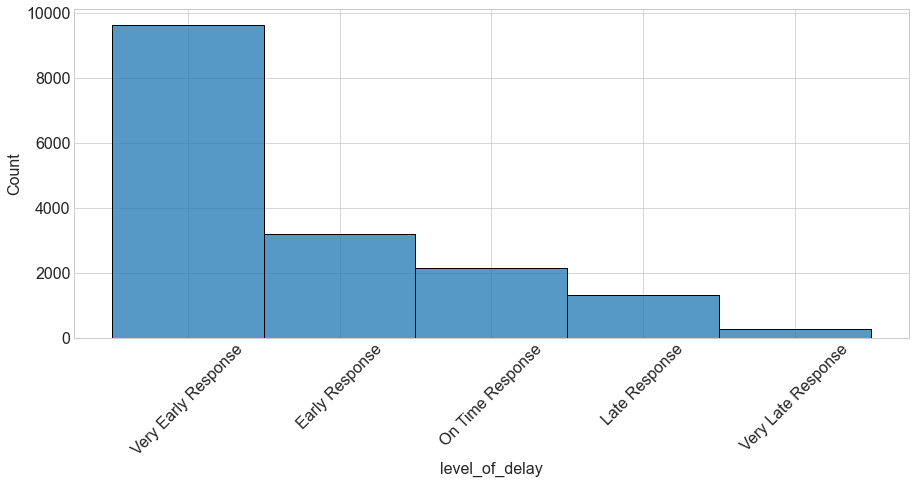

In [48]:
district10 = train[train['district_10'] == 1]

sns.histplot(data = district10, x = 'level_of_delay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Takeaways

- Across all districts response is classified as early

- there does not seem to be any difference in district of the city and how early the response is

### Statistical Tests

In [49]:
from math import sqrt

In [50]:
def get_anova_test(train):
    n = train.shape[0]     # number of observations
    degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
    conf_interval = .95 # desired confidence interval
    α = 1 - conf_interval
    null_hypothesis = 'there is no difference in days a case is open between the districts.'
    F, p = stats.f_oneway( 
        train.days_open[train.council_district== 0],
        train.days_open[train.council_district== 1],
        train.days_open[train.council_district== 2],
        train.days_open[train.council_district== 3],
        train.days_open[train.council_district== 4],
        train.days_open[train.council_district== 5],
        train.days_open[train.council_district== 6], 
        train.days_open[train.council_district== 7], 
        train.days_open[train.council_district== 8], 
        train.days_open[train.council_district== 9],
        train.days_open[train.council_district== 10]
        )
    if p > α:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
    else:
        return print("We reject the null hypothesis that", null_hypothesis)

In [51]:
get_anova_test(train)

We reject the null hypothesis that there is no difference in days a case is open between the districts.


In [52]:
H0 = 'there is no difference in days a case is open between district 1 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 1 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district1.days_open.mean()
s = district1.days_open.std()
n = district1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-3.5164771607018492
1.999561934108167
there is no difference in days a case is open between district 1 and the rest of the population


In [53]:
H0 = 'there is no difference in days a case is open between district 2 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 2 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district2.days_open.mean()
s = district2.days_open.std()
n = district2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

15.692154088368587
3.0361752339417658e-55
there is a significant difference between the days a case is open between district 2 and the general population


In [54]:
H0 = 'there is no difference in days a case is open between district 3 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 3 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district3.days_open.mean()
s = district3.days_open.std()
n = district3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

4.365145639010365
1.275326646626463e-05
there is a significant difference between the days a case is open between district 3 and the general population


In [55]:
H0 = 'there is no difference in days a case is open between district 4 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 4 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district4.days_open.mean()
s = district4.days_open.std()
n = district4.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-1.0469644984849142
1.7048709737183967
there is no difference in days a case is open between district 4 and the rest of the population


In [56]:
H0 = 'there is no difference in days a case is open between district 5 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 5 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district5.days_open.mean()
s = district5.days_open.std()
n = district5.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-1.008678772395285
1.6868626232120252
there is no difference in days a case is open between district 5 and the rest of the population


In [57]:
H0 = 'there is no difference in days a case is open between district 6 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 6 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district6.days_open.mean()
s = district6.days_open.std()
n = district6.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-0.7361140234455318
1.5383286100169498
there is no difference in days a case is open between district 6 and the rest of the population


In [58]:
H0 = 'there is no difference in days a case is open between district 7 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 7 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district7.days_open.mean()
s = district7.days_open.std()
n = district7.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-3.0567867689492374
1.9977596282665258
there is no difference in days a case is open between district 7 and the rest of the population


In [59]:
H0 = 'there is no difference in days a case is open between district 8 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 8 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district8.days_open.mean()
s = district8.days_open.std()
n = district8.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-10.349996034475824
2.0
there is no difference in days a case is open between district 8 and the rest of the population


In [60]:
H0 = 'there is no difference in days a case is open between district 9 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 9 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district9.days_open.mean()
s = district9.days_open.std()
n = district9.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-8.447267280001352
2.0
there is no difference in days a case is open between district 9 and the rest of the population


In [61]:
H0 = 'there is no difference in days a case is open between district 10 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between district 10 and the general population'

alpha = .05

μ = train.days_open.mean()
xbar = district10.days_open.mean()
s = district10.days_open.std()
n = district10.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-4.554957503964803
1.999994722975828
there is no difference in days a case is open between district 10 and the rest of the population


### Takeaways

- 0, 2, and 3 are the only district that have a significant difference in days open
    - South and Southest part of the city


- there is a significance between days open and council district

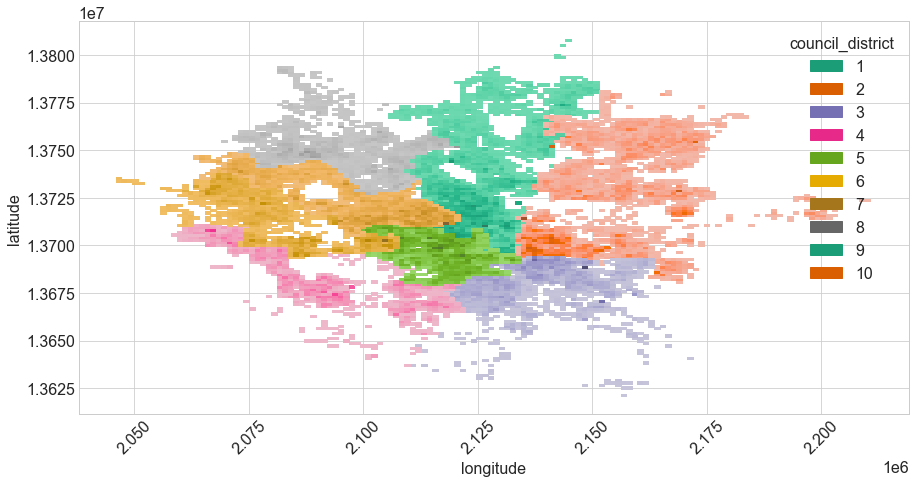

In [62]:
sns.histplot(data = train, x = 'longitude', y ='latitude', hue = 'council_district', palette= 'Dark2')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [63]:
def sa_map(train):
    '''
    This function will take in the train dataframe from the City of San Antoniot 311 data
    and return a crude map of the city by making data points using geospatial coordinates 
    of 311 cases provided by the city
    '''
    
    sns.histplot(data = train, x = 'longitude', y ='latitude', hue = 'council_district', palette= 'Dark2')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()
    

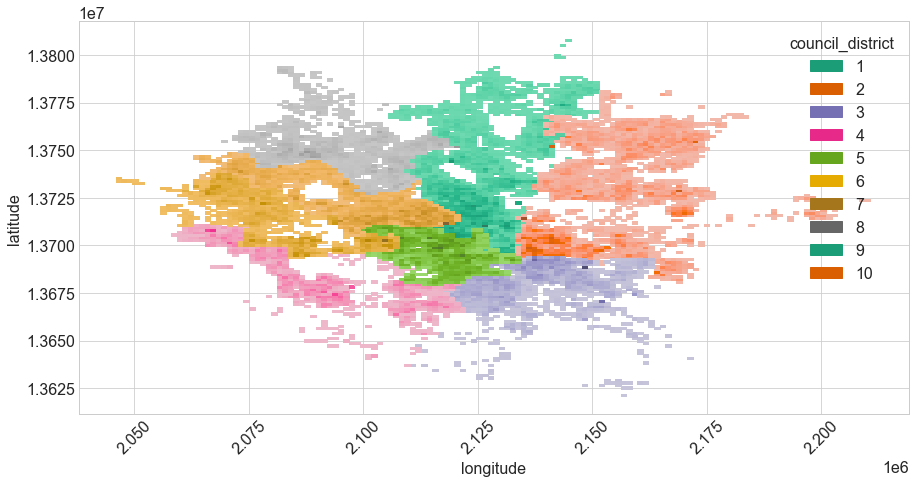

In [64]:
sa_map(train)

## Q2: What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199810 entries, 163054 to 53192
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 199810 non-null  datetime64[ns]
 1   due_date                  199810 non-null  datetime64[ns]
 2   closed_date               199810 non-null  datetime64[ns]
 3   is_late                   199810 non-null  object        
 4   dept                      199810 non-null  object        
 5   call_reason               199810 non-null  object        
 6   case_type                 199810 non-null  object        
 7   case_status               199810 non-null  object        
 8   source_id                 199810 non-null  object        
 9   address                   199810 non-null  object        
 10  council_district          199810 non-null  int64         
 11  longitude                 199810 non-null  float64       
 12

In [66]:
train['month'] = train.open_date.dt.month

In [67]:
train.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,month
163054,2020-09-11,2020-11-16,2020-09-14,NO,Development Services,code,Graffiti (Private Property),Closed,Web Portal,"2033 BANDERA RD, SAN ANTONIO, 78228",7,"2,102,206.00","13,719,896.00",4.00,67,63.00,0.06,Very Early Response,0,0,0,0,0,0,1,0,0,0,0.15,83287,78228,9,2020,37,25263,32.82,9
50372,2020-06-03,2020-06-10,2020-06-05,NO,Solid Waste Management,waste,Carts(Removed from Service),Closed,Web Portal,"134 KASHMUIR PLACE, SAN ANTONIO, 78223",3,"2,143,294.00","13,686,716.00",3.00,8,5.00,0.38,Very Early Response,0,0,1,0,0,0,0,0,0,0,0.11,69022,78223,6,2020,23,18281,116.15,6
52193,2020-06-04,2020-06-14,2020-06-21,YES,Animal Care Services,field,Animal Bite(Critical),Closed,Web Portal,"1250 NICHOLAS MANOR, SAN ANTONIO, 78258",9,"2,135,742.00","13,781,904.00",18.00,11,-7.00,1.64,Late Response,0,0,0,0,0,0,0,0,1,0,0.18,99309,78258,6,2020,23,42559,48.71,6
143136,2020-08-24,2020-08-31,2020-08-25,NO,Solid Waste Management,waste,Carts(Lost-Stolen),Closed,Web Portal,"4702 E SOUTHCROSS BLVD, SAN ANTONIO, 78222",3,"2,159,441.00","13,683,966.00",2.00,8,6.00,0.25,Very Early Response,0,0,1,0,0,0,0,0,0,0,0.11,69022,78222,8,2020,35,18281,116.15,8
180816,2020-10-01,2020-10-14,2020-10-08,NO,Solid Waste Management,waste,Out of Cycle(Brush/Bulky),Closed,Web Portal,"7134 SYMPHONY LANE, SAN ANTONIO, 78214",3,"2,137,290.00","13,676,779.00",8.00,14,6.00,0.57,Early Response,0,0,1,0,0,0,0,0,0,0,0.11,69022,78214,10,2020,40,18281,116.15,10


In [68]:
time_train = train.set_index('open_date').sort_index()

In [69]:
# time_train = time_train[time_train['case_status'] == 'Closed']

In [70]:
time_train.case_status.value_counts()

Closed    199810
Name: case_status, dtype: int64

In [71]:
time_train.head()

,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,month
open_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,"2,097,121.00","13,678,237.00","1,393.00",8,"-1,385.00",174.12,Very Late Response,0,0,0,1,0,0,0,0,0,0,0.08,66370,78242,1,2017,4,18500,65.21,1
2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,"2,117,463.00","13,706,003.00","1,386.00",8,"-1,378.00",173.25,Very Late Response,1,0,0,0,0,0,0,0,0,0,0.15,68081,78207,2,2017,5,23967,26.00,2
2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,"2,140,359.00","13,702,579.00","1,386.00",8,"-1,378.00",173.25,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.09,67656,78202,2,2017,5,19055,59.81,2
2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,"2,081,307.00","13,721,187.00","1,361.00",8,"-1,353.00",170.12,Very Late Response,0,0,0,0,0,1,0,0,0,0,0.12,80007,78251,2,2017,9,23437,38.44,2
2017-03-08,2017-03-09,2020-10-12,YES,Customer Service,customer_service,Compliment,Closed,Web Portal,"515 FRIO S, San Antonio, 78207",5,"2,126,090.00","13,701,005.00","1,315.00",2,"-1,313.00",657.50,Very Late Response,0,0,0,0,1,0,0,0,0,0,0.09,61418,78207,3,2017,10,13836,22.24,3


In [72]:
time_train.index.min(), time_train.index.max()

(Timestamp('2017-01-27 00:00:00'), Timestamp('2021-05-14 00:00:00'))

In [73]:
time_train.days_open.resample('M').mean().sort_values()

open_date
2021-05-31                   2.98
2021-04-30                   5.03
2021-03-31                   5.91
2021-01-31                   7.38
2021-02-28                   7.62
2020-12-31                   8.69
2020-11-30                   9.23
2020-10-31                   9.91
2020-07-31                  15.27
2020-06-30                  16.05
2020-08-31                  18.62
2020-09-30                  18.96
2020-05-31                  20.26
2020-04-30                 119.94
2020-03-31                 196.37
2020-02-29                 237.72
2019-12-31                 312.96
2019-11-30                 331.69
2020-01-31                 359.63
2019-10-31                 388.86
2019-09-30                 410.98
2019-08-31                 446.81
2019-07-31                 463.43
2019-06-30                 515.37
2019-05-31                 518.92
2019-04-30                 563.84
2019-03-31                 587.19
2019-02-28                 645.01
2019-01-31                 662.86
2018

<AxesSubplot:xlabel='open_date'>

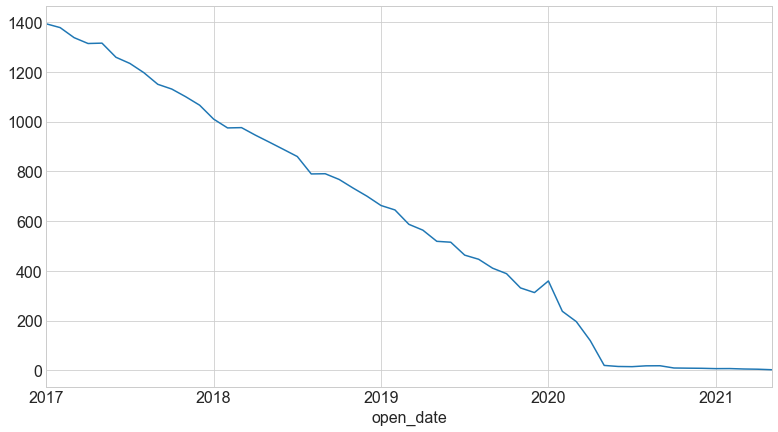

In [74]:
time_train.days_open.resample('M').mean().plot()

In [75]:
time_train.groupby('month').days_open.mean().sort_values()

month
11                  18.49
7                   20.47
10                  20.52
6                   20.69
5                   21.24
4                   24.03
8                   24.05
9                   24.71
3                   27.60
1                   30.79
12                  31.71
2                   36.32
Name: days_open, dtype: float64

<AxesSubplot:xlabel='month'>

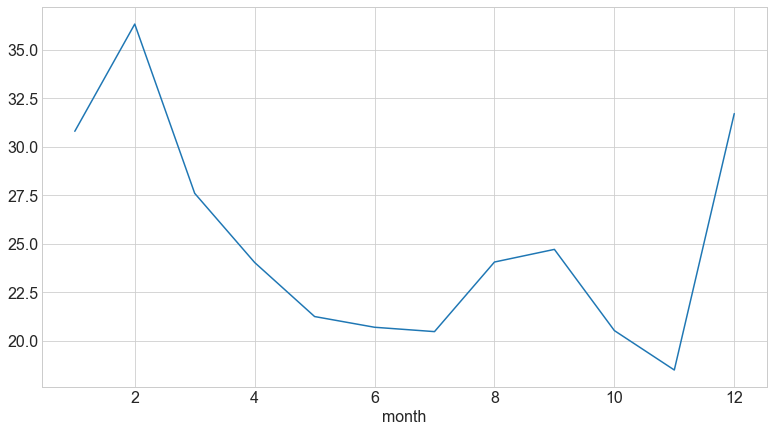

In [76]:
time_train.groupby('month').days_open.mean().plot()